# 2024-2 DSL 정규세션 과제

## CNN Assignment

- 작성자 : 11기 김현진
- 과제 제출 기한 : 08.25

---
- 이름 : 복지민
- 기수 : 12기



In [1]:
# colab 환경에서 학습을 진행하실 분들은 구글드라이브를 연동해주세요
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


코드의 빈칸을 채우는 것 외에 6개의 이론 + 학습 결과 확인 문제가 별도로 존재합니다. 꼼꼼히 확인하여 누락 없이 제출해주세요.

### 문제 1.

U-Net과 ResNet 아키텍쳐에서 동시에 등장하는 Skip Connection에 대해 설명해주세요.
Skip Connection의 간단한 정의와 각각의 모델에서 해당 기법이 왜 사용되는지를 중점으로 설명해주세요.

[풀이]


Skip Connection이란 입력 데이터 또는 중간 레이어의 출력을 여러 레이어를 건너뛰어 나중의 레이어에 직접 연결하는 기법을 의미합니다. 이는 얕은 층의 세부 위치 정보(fine location information)와 깊은 층의 전역 의미 정보(global semantic information)를 결합하는 방식으로 작동합니다.

ResNet에서 Skip Connection은 깊은 신경망에서 발생할 수 있는 기울기 소실 문제(vanishing gradient problem)를 해결하기 위해 사용됩니다. 입력 데이터가 여러 레이어를 건너뛰어 출력 레이어에 직접 연결되면서, 네트워크는 잔차 학습(Residual Learning)을 수행하게 됩니다. 이 방식에서는 신경망이 단순히 학습 대상 자체를 해결하려 하기보다는, 기존 값에서 얼마나 변화해야 하는지를 학습하게 됩니다. 결과적으로 네트워크는 학습 난이도가 낮아져 더 깊은 네트워크에서도 효과적인 학습이 가능해집니다.


U-Net에서의 Skip Connection은 인코더-디코더 구조에서 사용되며, 인코더 단계에서 추출된 피처 맵을 디코더 단계에 직접 연결합니다. 이 과정에서 인코더의 고해상도 정보가 디코더로 전달되어 디코더가 원본 이미지의 세부 정보를 복원할 수 있도록 돕습니다. 이러한 연결은 디코더가 원본 이미지에 대한 세밀한 위치 정보를 유지할 수 있게 하여, 최종적인 예측 정확도를 높이는 데 중요한 역할을 합니다.


### 문제 2.

conv layer의 얕은 층과 깊은 층 간에는 feature map이 담고 있는 정보 특성에 trade-off가 존재합니다. 이에 대해 구체적으로 설명해주세요. U-Net은 이를 어떻게 해결하고 있는지 Skip Connection과 연관지어 설명해주세요.

[풀이]

Convolutional layer에서 얕은 층과 깊은 층 간에는 feature map이 담고 있는 정보 특성에 차이가 있기 때문에 trade-off가 발생합니다.
- 얕은 층에서는 이미지의 로컬하고 디테일한 정보(local and detailed information)를 담은 feature map이 생성됩니다. 이들은 주로 엣지, 텍스처, 색상과 같은 저수준의 특성을 포착합니다. 하지만 이들 feature map은 더 작은 리셉티브 필드(receptive field)를 가지기 때문에 이미지의 전체적인 맥락(context)이나 전역적인 의미를 잘 이해하지 못합니다.
- 반면, 깊은 층에서는 이미지의 전역적이고 추상적인 컨텍스트 정보(global and abstract context information)를 담은 feature map이 생성됩니다. 깊은 층에서의 feature map은 리셉티브 필드가 커지기 때문에 이미지 전체의 의미를 파악하는 데 유리하지만, 로컬하고 세부적인 정보를 잃는 경향이 있습니다. 또한, 이들 feature map은 일반적으로 더 작은 크기를 가지기 때문에 해상도가 낮아집니다.
이러한 얕은 층과 깊은 층 간의 특성 차이로 인해, 로컬 정보와 전역 정보를 동시에 잘 반영하는 feature map을 얻는 것이 어려운 trade-off가 발생하게 됩니다.

U-Net은 이러한 trade-off를 해결하기 위해 Skip Connection을 활용합니다.
U-Net의 인코더(Contracting Path)에서 생성된 얕은 층의 고해상도 feature map을 디코더(Expanding Path)에서 생성된 깊은 층의 저해상도 feature map과 결합(concatenate)하여 사용합니다. 이를 통해 디코더는 깊은 층에서 추출한 전역적인 의미 정보를 바탕으로 이미지의 세부 정보를 복원하면서, 얕은 층에서 추출한 로컬한 세부 정보를 함께 활용할 수 있습니다.  U-Net에서는 디코더 단계에서 **upsampling**을 수행하며, 이 때 깊은 층의 저해상도 feature map과 얕은 층의 고해상도 feature map을 결합합니다. 이 결합을 통해 얕은 층의 세밀한 위치 정보와 깊은 층의 전역적 의미 정보가 동시에 포함된 feature map을 생성할 수 있게 됩니다.

따라서, U-Net은 Skip Connection을 통해 얕은 층과 깊은 층의 feature map 간의 정보 특성 차이에 따른 trade-off를 효과적으로 해결하고, 이미지의 세부적인 구조와 전역적인 의미를 모두 잘 반영하는 예측을 수행할 수 있게 됩니다.

## 라이브러리 가져오기 및 데이터 전처리

In [2]:
#필요한 라이브러리 가져오기
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms,datasets

데이터셋 설명: 총 30개의 세포 이미지와 각 픽셀의 레이블이 담긴 데이터셋입니다.
train, validation, test 데이터를 각각 24, 3, 3개로 나누어 학습 및 예측을 진행합니다.


U-Net이 아주 적은 학습 데이터셋에서도 Image segmentation을 잘 수행하고 있는지 직접 확인해보세요!

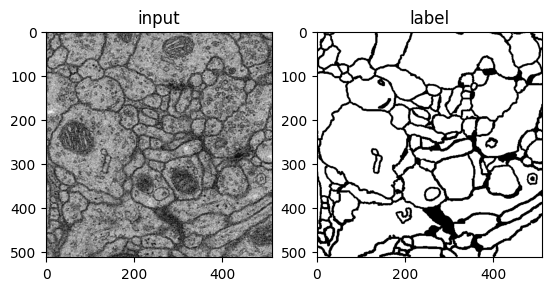

In [3]:
###해당 코드는 데이터셋 경로 수정 외에는 건드리지 말고 그대로 사용해주세요###

###데이터 전처리 코드###
## 라이브러리 불러오기
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## 데이터 불러오기
dir_data = '/content/drive/MyDrive/DSL/data'

name_label = 'train-labels.tif'
name_input = 'train-volume.tif'

img_label = Image.open(os.path.join(dir_data, name_label))
img_input = Image.open(os.path.join(dir_data, name_input))

ny, nx = img_label.size
nframe = img_label.n_frames

## train/test/val 폴더 생성
nframe_train = 24
nframe_val = 3
nframe_test = 3

dir_save_train = os.path.join(dir_data, 'train')
dir_save_val = os.path.join(dir_data, 'val')
dir_save_test = os.path.join(dir_data, 'test')

if not os.path.exists(dir_save_train):
    os.makedirs(dir_save_train)

if not os.path.exists(dir_save_val):
    os.makedirs(dir_save_val)

if not os.path.exists(dir_save_test):
    os.makedirs(dir_save_test)

## 전체 이미지 30개를 섞어줌
id_frame = np.arange(nframe)
np.random.shuffle(id_frame)

## 선택된 train 이미지를 npy 파일로 저장
offset_nframe = 0

for i in range(nframe_train):
    img_label.seek(id_frame[i + offset_nframe])
    img_input.seek(id_frame[i + offset_nframe])

    label_ = np.asarray(img_label)
    input_ = np.asarray(img_input)

    np.save(os.path.join(dir_save_train, 'label_%03d.npy' % i), label_)
    np.save(os.path.join(dir_save_train, 'input_%03d.npy' % i), input_)

## 선택된 val 이미지를 npy 파일로 저장
offset_nframe = nframe_train

for i in range(nframe_val):
    img_label.seek(id_frame[i + offset_nframe])
    img_input.seek(id_frame[i + offset_nframe])

    label_ = np.asarray(img_label)
    input_ = np.asarray(img_input)

    np.save(os.path.join(dir_save_val, 'label_%03d.npy' % i), label_)
    np.save(os.path.join(dir_save_val, 'input_%03d.npy' % i), input_)

## 선택된 test 이미지를 npy 파일로 저장
offset_nframe = nframe_train + nframe_val

for i in range(nframe_test):
    img_label.seek(id_frame[i + offset_nframe])
    img_input.seek(id_frame[i + offset_nframe])

    label_ = np.asarray(img_label)
    input_ = np.asarray(img_input)

    np.save(os.path.join(dir_save_test, 'label_%03d.npy' % i), label_)
    np.save(os.path.join(dir_save_test, 'input_%03d.npy' % i), input_)

## 이미지 시각화
plt.subplot(122)
plt.imshow(label_, cmap='gray')
plt.title('label')

plt.subplot(121)
plt.imshow(input_, cmap='gray')
plt.title('input')

plt.show()

## 1. U-Net 모델 아키텍쳐 구현

제공된 reading material을 참고하여 U-Net 아키텍쳐를 구현해 보세요.
U-Net의 구조를 하나하나 뜯어서 파악하고, input과 output featuremap size를 직접 손으로 계산해 숫자를 넣어보세요.

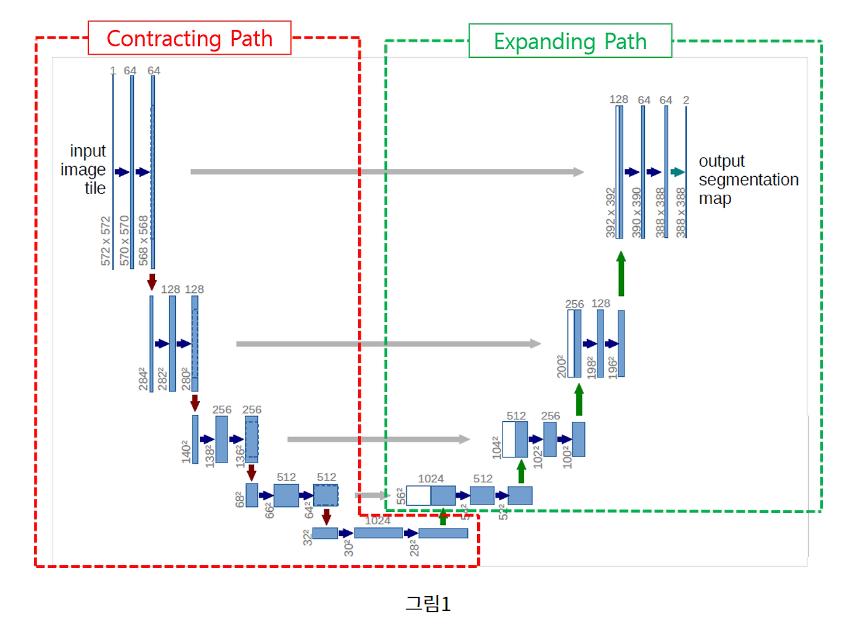

In [4]:
import torch
from torch import nn
import torch.nn.functional as F

import pandas as pd
import numpy as np

## 네트워크 구축하기
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()

        # Convolution + BatchNormalization + Relu 정의하기
        def CBR2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=True):
            layers = []
            layers += [nn.Conv2d(in_channels=in_channels, out_channels=out_channels,
                                 kernel_size=kernel_size, stride=stride, padding=padding,
                                 bias=bias)]
            layers += [nn.BatchNorm2d(num_features=out_channels)]
            layers += [nn.ReLU()]

            cbr = nn.Sequential(*layers)

            return cbr

        # 수축 경로(Contracting path)
        self.enc1_1 = CBR2d(in_channels=1, out_channels=64)
        self.enc1_2 = CBR2d(in_channels=64, out_channels=64)

        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.enc2_1 = CBR2d(in_channels=64, out_channels=128)
        self.enc2_2 = CBR2d(in_channels=128, out_channels=128)

        self.pool2 = nn.MaxPool2d(kernel_size=2)

        self.enc3_1 = CBR2d(in_channels=128, out_channels=256)
        self.enc3_2 = CBR2d(in_channels=256, out_channels=256)

        self.pool3 = nn.MaxPool2d(kernel_size=2)

        self.enc4_1 = CBR2d(in_channels=256, out_channels=512)
        self.enc4_2 = CBR2d(in_channels=512, out_channels=512)

        self.pool4 = nn.MaxPool2d(kernel_size=2)

        self.enc5_1 = CBR2d(in_channels=512, out_channels=1024)

        # 확장 경로(Expansive path)
        self.dec5_1 = CBR2d(in_channels=1024, out_channels=512)

        self.unpool4 = nn.ConvTranspose2d(in_channels=512, out_channels=512,
                                          kernel_size=2, stride=2, padding=0, bias=True)

        self.dec4_2 = CBR2d(in_channels=2 * 512, out_channels=512)
        self.dec4_1 = CBR2d(in_channels=512, out_channels=256)

        self.unpool3 = nn.ConvTranspose2d(in_channels=256, out_channels=256,
                                          kernel_size=2, stride=2, padding=0, bias=True)

        self.dec3_2 = CBR2d(in_channels=2 * 256, out_channels=256)
        self.dec3_1 = CBR2d(in_channels=256, out_channels=128)

        self.unpool2 = nn.ConvTranspose2d(in_channels=128, out_channels=128,
                                          kernel_size=2, stride=2, padding=0, bias=True)

        self.dec2_2 = CBR2d(in_channels=2 * 128, out_channels=128)
        self.dec2_1 = CBR2d(in_channels=128, out_channels=64)

        self.unpool1 = nn.ConvTranspose2d(in_channels=64, out_channels=64,
                                          kernel_size=2, stride=2, padding=0, bias=True)

        self.dec1_2 = CBR2d(in_channels=2 * 64, out_channels=64)
        self.dec1_1 = CBR2d(in_channels=64, out_channels=64)

        self.fc = nn.Conv2d(in_channels=64, out_channels=1, kernel_size=1, stride=1, padding=0, bias=True)

    # forward 함수 정의하기
    def forward(self, x):

        #수축
        enc1_1 = self.enc1_1(x)
        enc1_2 = self.enc1_2(enc1_1)
        pool1 = self.pool1(enc1_2)

        enc2_1 = self.enc2_1(pool1)
        enc2_2 = self.enc2_2(enc2_1)
        pool2 = self.pool2(enc2_2)

        enc3_1 = self.enc3_1(pool2)
        enc3_2 = self.enc3_2(enc3_1)
        pool3 = self.pool3(enc3_2)

        enc4_1 = self.enc4_1(pool3)
        enc4_2 = self.enc4_2(enc4_1)
        pool4 = self.pool4(enc4_2)

        enc5_1 = self.enc5_1(pool4)

        #확장
        dec5_1 = self.dec5_1(enc5_1)

        unpool4 = self.unpool4(dec5_1)
        cat4 = torch.cat((unpool4, enc4_2), dim=1)
        dec4_2 = self.dec4_2(cat4)
        dec4_1 = self.dec4_1(dec4_2)

        unpool3 = self.unpool3(dec4_1)
        cat3 = torch.cat((unpool3, enc3_2), dim=1)
        dec3_2 = self.dec3_2(cat3)
        dec3_1 = self.dec3_1(dec3_2)

        unpool2 = self.unpool2(dec3_1)
        cat2 = torch.cat((unpool2, enc2_2), dim=1)
        dec2_2 = self.dec2_2(cat2)
        dec2_1 = self.dec2_1(dec2_2)

        unpool1 = self.unpool1(dec2_1)
        cat1 = torch.cat((unpool1, enc1_2), dim=1)
        dec1_2 = self.dec1_2(cat1)
        dec1_1 = self.dec1_1(dec1_2)

        x = self.fc(dec1_1)

        return x

## 2. Dataset & Transform
데이터가 흘러갈 네트워크를 앞서 선언해 주었습니다. 이제 데이터를 잘 처리해서 네트워크에 흘려보내주면 됩니다. 파이토치는 데이터를 불러오고 변환하는 과정을 Dataset class와 Transform class로 구현합니다. 해당 Dataset class 부분은 빈칸을 뚫어놓지 않았습니다. 코드를 찬찬히 살펴봐주세요.

In [5]:
######  코드 수정 금지  ######
# 데이터 로더 구현하기
class Dataset(torch.utils.data.Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform

        lst_data = os.listdir(self.data_dir)

        lst_label = [f for f in lst_data if f.startswith('label')]
        lst_input = [f for f in lst_data if f.startswith('input')]

        lst_label.sort()
        lst_input.sort()

        self.lst_label = lst_label
        self.lst_input = lst_input

    def __len__(self):
        return len(self.lst_label)

    def __getitem__(self, index):
        label = np.load(os.path.join(self.data_dir, self.lst_label[index]))
        input = np.load(os.path.join(self.data_dir, self.lst_input[index]))

        # 정규화
        label = label/255.0
        input = input/255.0

        # 이미지와 레이블의 차원 = 2일 경우(채널이 없을 경우, 흑백 이미지), 새로운 채널(축) 생성
        if label.ndim == 2:
            label = label[:, :, np.newaxis]
        if input.ndim == 2:
            input = input[:, :, np.newaxis]

        data = {'input': input, 'label': label}

        # transform이 정의되어 있다면 transform을 거친 데이터를 불러옴
        if self.transform:
            data = self.transform(data)

        return data

다음은 Transform인데, 이 부분은 여러분의 직관에 따라 원하는 전처리를 진행해주면 됩니다. 일반적으로 데이터가 numpy 형태라면 tensor로 바꿔주고, 이미지의 경우 Flip(방향 뒤집기)을 통해 data augumentation 효과를 주기도 합니다. 해당 코드는 데이터가 np 형태이므로 tensor로 바꿔주었고, 이미지이므로 언급한 두 변환에 더해 정규화도 취하고 있습니다.
\
\
외에 더하고 싶은 것을 추가해도 좋습니다. 자유롭게 수정해보세요 !

In [6]:
class ToTensor(object):
    def __call__(self, data):
        label, input = data['label'], data['input']

        # numpy와 tensor의 배열 차원 순서가 다르다.
        # numpy : (행, 열, 채널)
        # tensor : (채널, 행, 열)
        # 따라서 위 순서에 맞춰 transpose

        label = label.transpose((2, 0, 1)).astype(np.float32)
        input = input.transpose((2, 0, 1)).astype(np.float32)


        data = {'label': torch.from_numpy(label), 'input': torch.from_numpy(input)}

        return data

######  수정 금지  ######
class Normalization(object):
    def __init__(self, mean=0.5, std=0.5):
        self.mean = mean
        self.std = std

    def __call__(self, data):
        label, input = data['label'], data['input']

        input = (input - self.mean) / self.std

        data = {'label': label, 'input': input}

        return data


######  TODO를 채우고 또 다른 기능을 자유롭게 추가해보세용  ######
class RandomFlip(object):
    def __call__(self, data):
        label, input = data['label'], data['input']

        if np.random.rand() > 0.5:
            label = np.fliplr(label)
            input = np.fliplr(input)

        if np.random.rand() > 0.5:
            label = np.flipud(label)
            input = np.flipud(input)

        #대각선 방향으로 random flip
        if np.random.rand() > 0.5:
            label = np.transpose(label, (1, 0, 2))  # 가로-세로 축 교환
            input = np.transpose(input, (1, 0, 2))

        data = {'label': label, 'input': input}

        return data

### 문제 3.

모델의 generalization을 높여주기 위해 Augmentation을 사용할 수 있다고 했습니다.

PyTorch 구현상으로는 train, validation, test 모든 단계에 Augmention를 구현할 수 있습니다만, 실제로는 train 단계에서만 Augmention를 수행하게 됩니다. 그 이유에 대해서 설명해주세요.


[풀이]

Augmentation의 가장 큰 목적은 모델 학습에 필요한 데이터 다양성 제공입니다. 모델이 다양한 형태의 데이터를 학습하여 실제 데이터에서도 좋은 성능을 보일 수 있기 때문입니다.
Train 단계와 달리 Validation, Test는 목적이 다릅니다. Validation 단계는 모델의 성능을 평가하여 일반화가 얼마나 잘 이루어지는지 확인하는 단계입니다. Test 단계는 모델이 학습하지 않은 데이터에 대해 얼마나 잘 작동하는지 확인하여 모델의 성능을 평가하는 단계입니다. 모델의 성능을 객관적으로 평가하기 위한 단계에서 데이터 증강을 행하게 되면 모델의 예측성, 다른 모델과의 차별성을 비교하기 어려워지게 됩니다. 더불어 모델의 성능으 과대평가/과소평가하는 상황이 발생할 수 있기에 augmentation은 train 단계에서만 진행하게 됩니다.

In [7]:
######  코드 수정 금지  ######
## 네트워크 저장하기
def save(ckpt_dir, net, optim, epoch):
    if not os.path.exists(ckpt_dir):
        os.makedirs(ckpt_dir)

    torch.save({'net': net.state_dict(), 'optim': optim.state_dict()},
               "%s/model_epoch%d.pth" % (ckpt_dir, epoch))

## 네트워크 불러오기
def load(ckpt_dir, net, optim):
    if not os.path.exists(ckpt_dir):
        epoch = 0
        return net, optim, epoch

    ckpt_lst = os.listdir(ckpt_dir)
    ckpt_lst.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

    dict_model = torch.load('%s/%s' % (ckpt_dir, ckpt_lst[-1]))

    net.load_state_dict(dict_model['net'])
    optim.load_state_dict(dict_model['optim'])
    epoch = int(ckpt_lst[-1].split('epoch')[1].split('.pth')[0])

    return net, optim, epoch

## 문제 4.

U-Net 모델의 논문에서는 biomedical image segmentation에 최적화된 손실함수를 다음과 같이 따로 정의하고 있습니다.

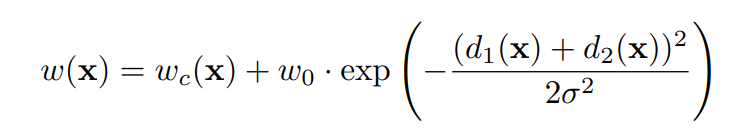

여기서 1) 가중치 w(x)의 의미는 무엇인지, 2) 가중치가 커지는 조건은 무엇인지, 3) 이러한 새로운 손실함수 정의의 목적(해당 task만의 특징에 기반하여)은 무엇인지 말로 풀어서 설명해주세요.

[풀이]


(1) 가중치 w(x)는 각 픽셀에 대해 계산되는 가중치로, 손실 함수에서 **해당 픽셀의 중요도를 결정**합니다. 이 가중치는 특정 픽셀들이 세그멘테이션 작업에서 얼마나 중요한지를 나타내며, 잘못된 예측을 할 경우 큰 손실을 초래하는 픽셀들에게 높은 가중치를 부여합니다.

(2) 가장 가까운 세포와 그 다음으로 가장 가까운 세포간의 거리가 pixel과 가까울수록, 거리합 제곱 ((d1(x)+d2(x)^2)이 작아지는데 exp 안에서 음수(-) 값이 붙기에 전체적으로 지수함수의 값은 커지게 됩니다. 즉, 가까이에 있을수록 해당 pixel은 큰 가중치 w(x)를 가지게 됩니다. 가중치가 커지게 되는 조건은 **(i) 경계선 근처에 있는 픽셀(분할 오류 감소), (ii) 희소한 클래스의 픽셀**(드문 클래스의 분류) 일 경우입니다.


(3) Cell image segmentation에서 같은 class를 갖는 인접한 cell간의 구분이 어렵다는 점을 고려하여 경계에 해당하는 pixel을 더 잘 분류할 수 있도록 경계에 속한 pixel들의 가중치를 더 강하게 해주는 손실함수를 정의한 것입니다. 즉, **(i) 경계선 정확도 향상, (ii) 불균형 클래스 처리**를 위해 이러한 가중치 기반 손실 함수를 설정한 것으로 이해할 수 있습니다.

## 3. 손실함수 정의

U-Net 논문을 통해 우리는 이들이 biomedical image segmentation을 위해 세포의 border pixel에 가중치를 두도록 하는 독특한 손실함수를 새로 정의하고 있음을 알 수 있습니다.

아래의 코드를 통해 해당 손실함수를 구현해보고, 기존의 nn.BCEWithLogitsLoss()와 비교하여 성능에 차이가 있는지, 있다면 어느 손실함수를 택하는 것이 효과적인지 고려해봅시다.



** from scipy.ndimage import distance_transform_edt \

->  SciPy 라이브러리의 ndimage 모듈에 포함된 함수로, 이진 이미지에서 각 픽셀까지의 최단 거리(유클리드 거리)를 계산한다 !

주요 개념\
이진 이미지: 픽셀 값이 0 또는 1인 이미지. 1은 객체가 있는 영역, 0은 배경을 의미한다.\
거리 변환: 각 픽셀에서 가장 가까운 0이 아닌 픽셀까지의 거리 값을 계산. 이 거리 값은 유클리드 거리를 사용하여 측정된다.

In [9]:
from torch.utils.tensorboard import SummaryWriter
from scipy.ndimage import distance_transform_edt

# 사용자 정의 WeightedBCEWithLogitsLoss 구현
class WeightedBCEWithLogitsLoss(nn.Module):
    def __init__(self, border_weight=5):
        super(WeightedBCEWithLogitsLoss, self).__init__()
        self.bce_loss = nn.BCEWithLogitsLoss(reduction='none')  # 가중치를 직접 적용하기 위해 'none' 사용
        self.border_weight = border_weight

    def forward(self, inputs, targets):
        # BCE 손실 계산
        bce = self.bce_loss(inputs, targets)

        # 경계 가중치 맵 생성
        weight_map = create_border_weight_map(targets, self.border_weight).to(inputs.device)
        bce *= weight_map

        # 평균 손실 계산
        return bce.mean()

def create_border_weight_map(targets, border_weight=5):
    """
    경계 픽셀에 가중치를 부여하기 위한 가중치 맵 생성.
    :param targets: 실제 라벨 (0과 1 사이의 값)
    :param border_weight: 경계 픽셀에 적용할 가중치
    :return: 가중치 맵
    """
    weight_map = torch.ones_like(targets)
    targets_np = targets.cpu().numpy()

    for i in range(targets_np.shape[0]):  # 배치 내 각 샘플에 대해
        distance_to_foreground = distance_transform_edt(targets_np[i] == 1)
        distance_to_background = distance_transform_edt(targets_np[i] == 0)
        border_mask = (distance_to_foreground + distance_to_background) <= 2
        weight_map[i][border_mask] = border_weight

    return weight_map

## 4. Training

In [10]:
######  코드 수정 금지  ######
# 정확도 계산 함수 정의

def compute_accuracy(predictions, labels, threshold=0.5):
    """ Calculate pixel-wise accuracy. """
    with torch.no_grad():
        # threshold를 기준으로 예측 값을 바이너리로 변환
        pred_binary = (predictions > threshold).float()

        # 정확한 예측 픽셀의 비율을 계산
        correct_pixels = torch.sum(pred_binary == labels).item()
        total_pixels = torch.numel(labels)

        return correct_pixels / total_pixels

In [13]:
# 훈련 파라미터 설정하기
lr = 1e-3
batch_size = 4
num_epoch = 20

#파일 생성 코드입니다. 해당 파일을 생성하고자 하는 경로를 적절히 설정해주세요.#
base_dir = '/content/drive/MyDrive/DSL'
data_dir = dir_data
ckpt_dir = os.path.join(base_dir, "checkpoint")
log_dir = os.path.join(base_dir, "log")


# 훈련을 위한 Transform과 DataLoader
transform = transforms.Compose([Normalization(mean=0.5, std=0.5), RandomFlip(), ToTensor()])

dataset_train = Dataset(data_dir=os.path.join(data_dir, 'train'), transform=transform)
loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True, num_workers=8)

dataset_val = Dataset(data_dir=os.path.join(data_dir, 'val'), transform=transform)
loader_val = DataLoader(dataset_val, batch_size=batch_size, shuffle=False, num_workers=8)

# 네트워크 생성하기
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = UNet().to(device)

# 손실함수 정의하기
fn_loss = WeightedBCEWithLogitsLoss(border_weight=5).to(device)
#fn_loss = nn.BCEWithLogitsLoss().to(device)

# Optimizer 설정하기
optim = torch.optim.Adam(net.parameters(), lr=lr)

# 그밖에 부수적인 variables 설정하기
num_data_train = len(dataset_train)
num_data_val = len(dataset_val)

num_batch_train = np.ceil(num_data_train / batch_size)
num_batch_val = np.ceil(num_data_val / batch_size)

# 그 밖에 부수적인 functions 설정하기
fn_tonumpy = lambda x: x.to('cpu').detach().numpy().transpose(0, 2, 3, 1)
fn_denorm = lambda x, mean, std: (x * std) + mean
fn_class = lambda x: 1.0 * (x > 0.5)

# Tensorboard 를 사용하기 위한 SummaryWriter 설정
writer_train = SummaryWriter(log_dir=os.path.join(log_dir, 'train'))
writer_val = SummaryWriter(log_dir=os.path.join(log_dir, 'val'))

In [14]:
# 네트워크 학습시키기
st_epoch = 0
# 학습한 모델이 있을 경우 모델 로드하기
net, optim, st_epoch = load(ckpt_dir=ckpt_dir, net=net, optim=optim)

for epoch in range(st_epoch + 1, num_epoch + 1):
    net.train()
    loss_arr = []
    accuracy_arr = []

    for batch, data in enumerate(loader_train, 1):
        # forward pass
        label = data['label'].to(device)
        input = data['input'].to(device)

        output = net(input)

        # backward pass
        optim.zero_grad()

        loss = fn_loss(output, label)
        loss.backward()
        optim.step()

        # 손실함수 계산
        loss_arr.append(loss.item())

        # 정확도 계산
        acc = compute_accuracy(output, label)
        accuracy_arr.append(acc)

        print("TRAIN: EPOCH %04d / %04d | BATCH %04d / %04d | LOSS %.4f | ACCURACY %.4f" %
              (epoch, num_epoch, batch, num_batch_train, np.mean(loss_arr), np.mean(accuracy_arr)))

        # Tensorboard 저장하기
        label = fn_tonumpy(label)
        input = fn_tonumpy(fn_denorm(input, mean=0.5, std=0.5))
        output = fn_tonumpy(fn_class(output))

        writer_train.add_image('label', label, num_batch_train * (epoch - 1) + batch, dataformats='NHWC')
        writer_train.add_image('input', input, num_batch_train * (epoch - 1) + batch, dataformats='NHWC')
        writer_train.add_image('output', output, num_batch_train * (epoch - 1) + batch, dataformats='NHWC')

    writer_train.add_scalar('loss', np.mean(loss_arr), epoch)
    writer_train.add_scalar('accuracy', np.mean(accuracy_arr), epoch)

    with torch.no_grad():
        net.eval()
        loss_arr = []
        accuracy_arr = []

        for batch, data in enumerate(loader_val, 1):
            # forward pass
            label = data['label'].to(device)
            input = data['input'].to(device)

            output = net(input)

            # 손실함수 계산하기
            loss = fn_loss(output, label)
            loss_arr.append(loss.item())

            # 정확도 계산
            acc = compute_accuracy(output, label)
            accuracy_arr.append(acc)

            print("VALID: EPOCH %04d / %04d | BATCH %04d / %04d | LOSS %.4f | ACCURACY %.4f" %
                  (epoch, num_epoch, batch, num_batch_val, np.mean(loss_arr), np.mean(accuracy_arr)))

            # Tensorboard 저장하기
            label = fn_tonumpy(label)
            input = fn_tonumpy(fn_denorm(input, mean=0.5, std=0.5))
            output = fn_tonumpy(fn_class(output))

            writer_val.add_image('label', label, num_batch_val * (epoch - 1) + batch, dataformats='NHWC')
            writer_val.add_image('input', input, num_batch_val * (epoch - 1) + batch, dataformats='NHWC')
            writer_val.add_image('output', output, num_batch_val * (epoch - 1) + batch, dataformats='NHWC')

        writer_val.add_scalar('loss', np.mean(loss_arr), epoch)
        writer_val.add_scalar('accuracy', np.mean(accuracy_arr), epoch)

    # epoch 50마다 모델 저장하기
    if epoch % 50 == 0:
        save(ckpt_dir=ckpt_dir, net=net, optim=optim, epoch=epoch)

writer_train.close()
writer_val.close()

TRAIN: EPOCH 0001 / 0020 | BATCH 0001 / 0006 | LOSS 1.2849 | ACCURACY 0.2337
TRAIN: EPOCH 0001 / 0020 | BATCH 0002 / 0006 | LOSS 1.2206 | ACCURACY 0.4226
TRAIN: EPOCH 0001 / 0020 | BATCH 0003 / 0006 | LOSS 1.1803 | ACCURACY 0.5120
TRAIN: EPOCH 0001 / 0020 | BATCH 0004 / 0006 | LOSS 1.1583 | ACCURACY 0.5609
TRAIN: EPOCH 0001 / 0020 | BATCH 0005 / 0006 | LOSS 1.1295 | ACCURACY 0.5952
TRAIN: EPOCH 0001 / 0020 | BATCH 0006 / 0006 | LOSS 1.1121 | ACCURACY 0.6191
VALID: EPOCH 0001 / 0020 | BATCH 0001 / 0001 | LOSS 1.2783 | ACCURACY 0.2391
TRAIN: EPOCH 0002 / 0020 | BATCH 0001 / 0006 | LOSS 0.9809 | ACCURACY 0.7540
TRAIN: EPOCH 0002 / 0020 | BATCH 0002 / 0006 | LOSS 0.9733 | ACCURACY 0.7623
TRAIN: EPOCH 0002 / 0020 | BATCH 0003 / 0006 | LOSS 0.9577 | ACCURACY 0.7607
TRAIN: EPOCH 0002 / 0020 | BATCH 0004 / 0006 | LOSS 0.9544 | ACCURACY 0.7649
TRAIN: EPOCH 0002 / 0020 | BATCH 0005 / 0006 | LOSS 0.9488 | ACCURACY 0.7672
TRAIN: EPOCH 0002 / 0020 | BATCH 0006 / 0006 | LOSS 0.9588 | ACCURACY 0.7621

## 5. Test

학습이 모두 끝났다면, 가장 낮은 validation loss를 기록한 모델의 파라미터를 불러오도록 합시다.

이후에는 accuracy 등을 측정하여 모델이 얼마나 잘 학습되었는지 평가하도록 하겠습니다.


### 문제 5.

accuracy 90% 이상이 되도록 학습률 에포크 등의 하이퍼파라미터를 조절해주세요.
학습의 결과를 캡쳐하여 하단에 첨부해주세요.

lr = 1e-3
batch_size = 4
num_epoch = 20

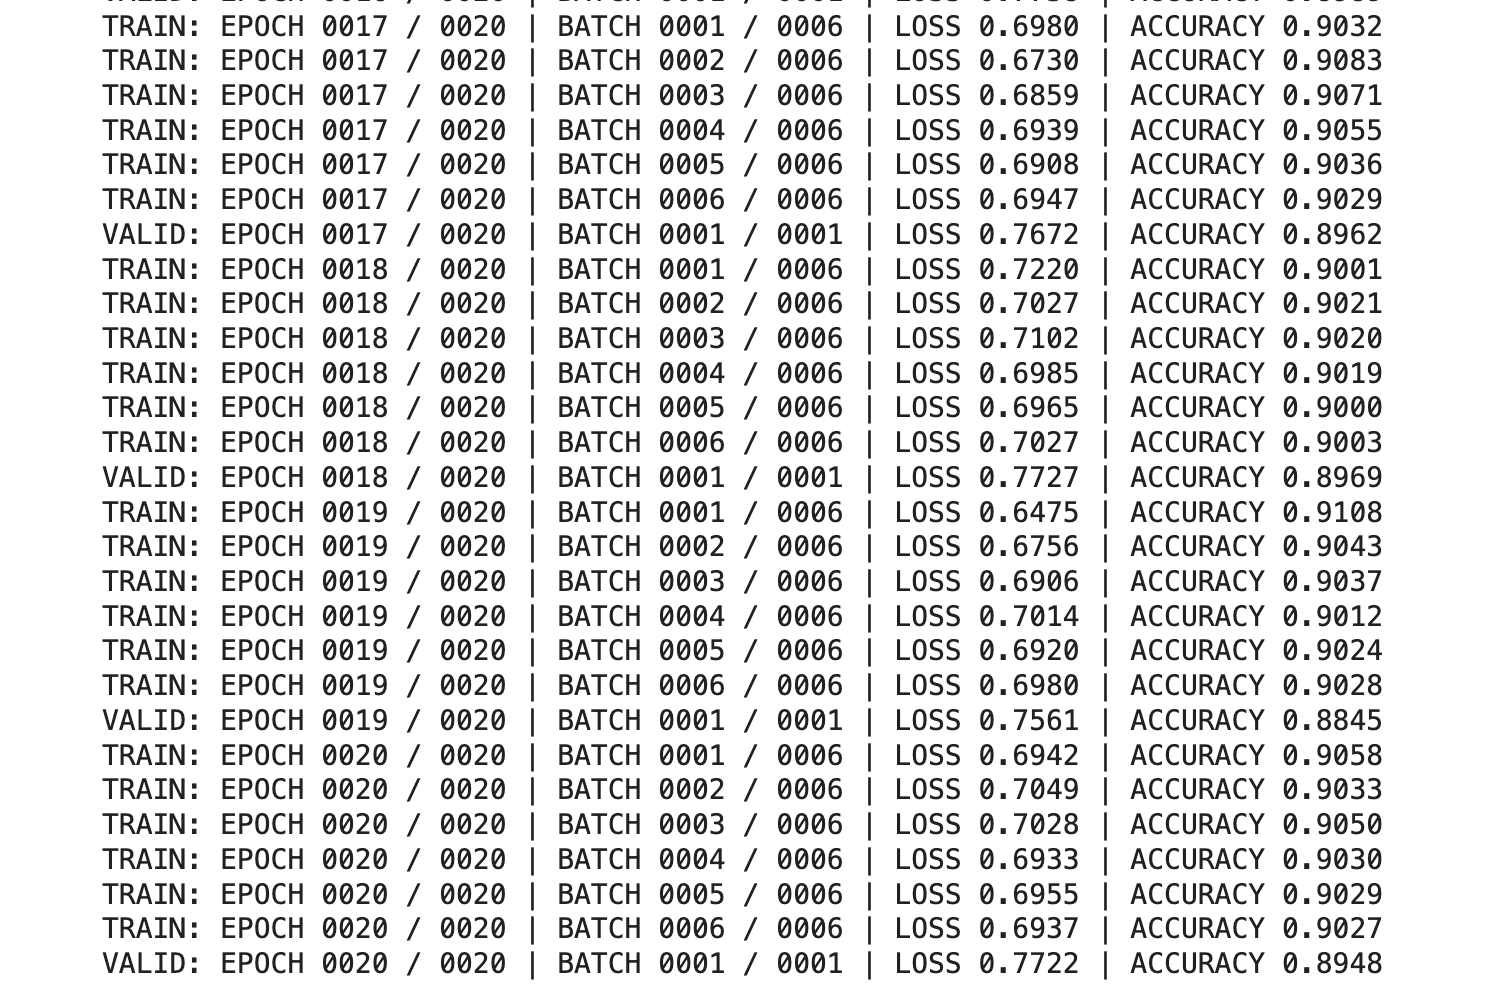

[풀이]

In [15]:
transform = transforms.Compose([Normalization(mean=0.5, std=0.5), ToTensor()])
dataset_test = Dataset(data_dir=os.path.join(data_dir, 'test'), transform=transform)
loader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=False, num_workers=8)

# 그밖에 부수적인 variables 설정하기
num_data_test = len(dataset_test)
num_batch_test = np.ceil(num_data_test / batch_size)

# 결과 디렉토리 생성하기
result_dir = os.path.join(base_dir, 'result')
if not os.path.exists(result_dir):
    os.makedirs(os.path.join(result_dir, 'png'))
    os.makedirs(os.path.join(result_dir, 'numpy'))


net, optim, st_epoch = load(ckpt_dir=ckpt_dir, net=net, optim=optim)
# 테스트 수행하기
with torch.no_grad():
    net.eval()
    loss_arr = []
    accuracy_arr = []

    for batch, data in enumerate(loader_test, 1):
        # forward pass
        label = data['label'].to(device)
        input = data['input'].to(device)

        output = net(input)

        # 손실 함수 계산하기
        loss = fn_loss(output, label)
        loss_arr.append(loss.item())

        # 정확도 계산하기
        acc = compute_accuracy(output, label)
        accuracy_arr.append(acc)

        print("TEST: BATCH %04d / %04d | LOSS %.4f | ACCURACY %.4f" %
              (batch, num_batch_test, np.mean(loss_arr), np.mean(accuracy_arr)))

        # 결과 저장하기
        label = fn_tonumpy(label)
        input = fn_tonumpy(fn_denorm(input, mean=0.5, std=0.5))
        output = fn_tonumpy(fn_class(output))

        for j in range(label.shape[0]):
            id = num_batch_test * (batch - 1) + j

            plt.imsave(os.path.join(result_dir, 'png', 'label_%04d.png' % id), label[j].squeeze(), cmap='gray')
            plt.imsave(os.path.join(result_dir, 'png', 'input_%04d.png' % id), input[j].squeeze(), cmap='gray')
            plt.imsave(os.path.join(result_dir, 'png', 'output_%04d.png' % id), output[j].squeeze(), cmap='gray')

            np.save(os.path.join(result_dir, 'numpy', 'label_%04d.npy' % id), label[j].squeeze())
            np.save(os.path.join(result_dir, 'numpy', 'input_%04d.npy' % id), input[j].squeeze())
            np.save(os.path.join(result_dir, 'numpy', 'output_%04d.npy' % id), output[j].squeeze())

    # 평균 손실과 정확도 출력
    avg_loss = np.mean(loss_arr)
    avg_accuracy = np.mean(accuracy_arr)
    print("AVERAGE TEST: BATCH %04d / %04d | LOSS %.4f | ACCURACY %.4f" %
          (batch, num_batch_test, avg_loss, avg_accuracy))

TEST: BATCH 0001 / 0001 | LOSS 0.7033 | ACCURACY 0.9064
AVERAGE TEST: BATCH 0001 / 0001 | LOSS 0.7033 | ACCURACY 0.9064


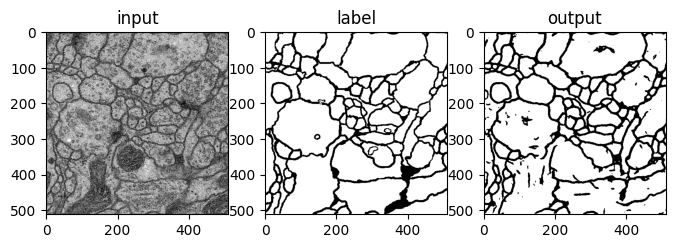

In [16]:
######  결과를 확인해보세요!  ######
lst_data = os.listdir(os.path.join(result_dir, 'numpy'))

lst_label = [f for f in lst_data if f.startswith('label')]
lst_input = [f for f in lst_data if f.startswith('input')]
lst_output = [f for f in lst_data if f.startswith('output')]

lst_label.sort()
lst_input.sort()
lst_output.sort()

##
id = 0

label = np.load(os.path.join(result_dir,"numpy", lst_label[id]))
input = np.load(os.path.join(result_dir,"numpy", lst_input[id]))
output = np.load(os.path.join(result_dir,"numpy", lst_output[id]))

## 플롯 그리기
plt.figure(figsize=(8,6))
plt.subplot(131)
plt.imshow(input, cmap='gray')
plt.title('input')

plt.subplot(132)
plt.imshow(label, cmap='gray')
plt.title('label')

plt.subplot(133)
plt.imshow(output, cmap='gray')
plt.title('output')

plt.show()

### 문제 6.

U-Net의 논문과 코드 모두를 살펴보았습니다. 해당 과제를 수행하면서 알게 된 U-Net의 특징을 1) 모델 설계 의도 2) 구조적 특징 3) 손실함수 및 데이터 증강기법으로 나누어 서술해주세요.

[풀이]

**(1) 모델 설계 의도**

U-Net 모델은 주로 생물의학 이미지 분할(biomedical image segmentation)을 위해 설계된 아키텍처로, 정확하고 세밀한 분할 결과를 얻기 위해 개발되었습니다.

U-Net의 설계 의도는 작은 데이터셋에서 정확한 이미지 분할을 수행하는 것입니다. 특히, 의료 영상과 같이 데이터가 제한적이고 고해상도의 세밀한 분할이 필요한 분야에서, 기존의 Fully Convolutional Network(FCN)과 같은 모델보다 더 나은 성능을 목표로 했습니다. U-Net은 효율적인 학습과 정확한 경계 구분을 통해 픽셀 단위의 예측을 정확하게 수행할 수 있도록 설계되었습니다.



**(2) 구조적 특징**

U-Net은 대칭적인 인코더-디코더 아키텍처로 구성되어 있습니다.

인코더(Contracting path): 인코더는 이미지를 점진적으로 축소하면서 고수준의 의미론적(feature) 정보를 추출합니다. 이는 연속적인 convolution과 pooling 연산으로 이루어져 있으며, 이미지의 공간 해상도를 줄이면서 더 추상적인 특징을 학습합니다.

디코더(Expansive path): 디코더는 인코더의 역방향으로 작동하여 이미지를 점진적으로 복원하면서 고해상도의 출력을 생성합니다. 이는 연속적인 up-convolution을 통해 이루어지며, 점진적으로 이미지를 원래 해상도로 복원합니다.

Skip Connection: U-Net의 핵심적인 구조적 특징 중 하나는 인코더와 디코더 사이의 Skip Connection입니다. 이는 인코더의 각 단계에서 추출된 세부 정보를 디코더의 대응 단계로 직접 연결하여, 세밀한 위치 정보를 보존하고 디코더가 원본 이미지에 대한 세부 정보를 더 정확하게 복원할 수 있도록 합니다. 이로 인해, 모델은 깊은 층에서 발생할 수 있는 정보 손실을 방지하고, 더 정밀한 예측을 할 수 있습니다.



**(3) 손실 함수 및 데이터 증강 기법**

손실 함수: U-Net 논문에서는 생물의학 이미지에서 중요한 경계 정보를 강조하기 위해 픽셀마다 가중치를 부여하는 손실 함수를 정의했습니다. 이 가중치 맵은 경계 근처의 픽셀에 더 높은 가중치를 할당함으로써, 모델이 작은 객체나 좁은 경계를 더 잘 학습할 수 있도록 돕습니다. 특히, 이 가중치는 distance transform을 사용하여 계산되며, 서로 다른 클래스 간의 경계에 더 큰 중요도를 부여합니다.

데이터 증강 기법: U-Net은 데이터 증강을 통해 모델의 일반화 성능을 높였습니다. 특히, 의료 영상에서는 데이터셋이 제한적인 경우가 많기 때문에, 회전, 좌우 반전, 상하 반전, 이동, 크기 조정 등 다양한 증강 기법을 사용하여 데이터의 다양성을 높였습니다. 이러한 증강 기법은 모델이 다양한 상황에서 잘 작동하도록 도와줍니다. 하지만 테스트 단계에서는 증강을 수행하지 않으며, 이는 모델의 평가가 데이터 증강 없이 실제 데이터를 기반으로 수행되어야 하기 때문입니다.



수고 많으셨습니다 !!

References:\
10기 윤형진 CNN 과제